<a href="https://colab.research.google.com/github/Henrique0078/Base_census/blob/main/Base_de_dados_do_censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base de dados do censo
Fonte: https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 74.8 MB/s eta 0:00:00


In [2]:
!pip -q install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Exploração dos dados

In [4]:
base_census = pd.read_csv('/content/census.csv')

In [5]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
base_census.describe()
#Aparentemente sem erros do tipo valores negativos e afins

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
base_census.isnull().sum()
#Sem valores nulos

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Visualização dos dados

In [13]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

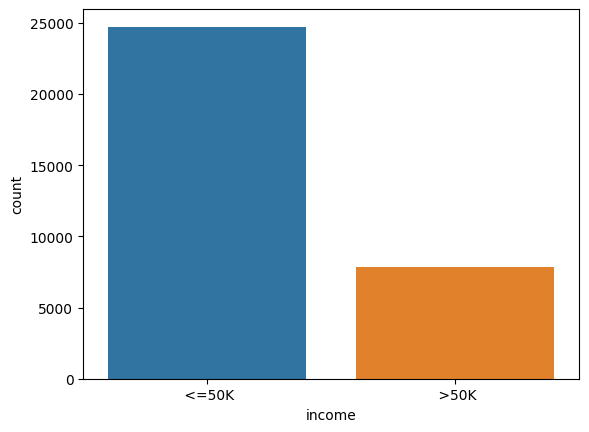

In [15]:
sns.countplot(x = base_census['income']);

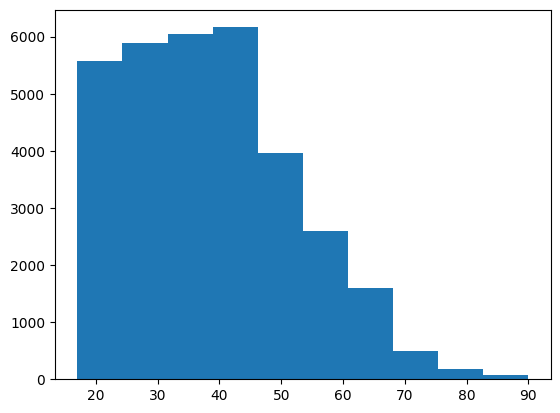

In [16]:
plt.hist(x = base_census['age']);

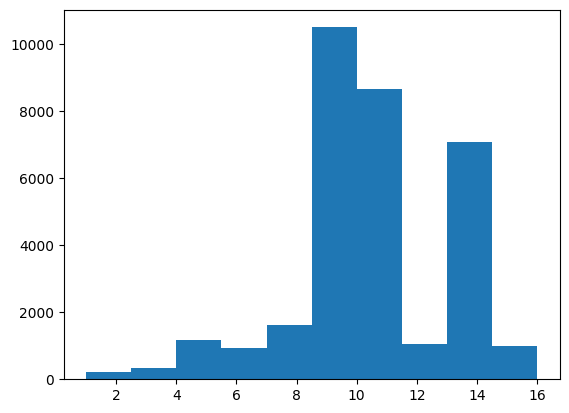

In [18]:
plt.hist(x = base_census['education-num']);

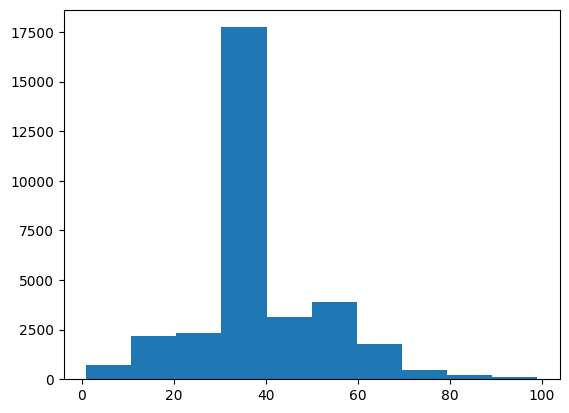

In [19]:
plt.hist(x = base_census['hour-per-week']);

In [22]:
grafico = px.treemap(base_census, path= ['workclass', 'age'])
grafico.show()

In [25]:
grafico = px.treemap(base_census, path= ['occupation', 'relationship', 'sex', 'age'])
grafico.show()

In [33]:
grafico = px.parallel_categories(base_census, dimensions= ['occupation', 'relationship', 'sex'])
grafico.show()

Divisão entre previsores e classe

In [36]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [37]:
x_census = base_census.iloc[:, 0:14].values

In [38]:
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [39]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [40]:
y_census = base_census.iloc[:, 14].values

In [41]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

Tratamento de atributos categoricos

LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
a = LabelEncoder()

In [45]:
teste = a.fit_transform(x_census[:, 1])

In [46]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [48]:
x_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [49]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [53]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [54]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_matiral = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_native = LabelEncoder()

In [55]:
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3])
x_census[:, 5] = label_encoder_matiral.fit_transform(x_census[:, 5])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:, 7])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_native.fit_transform(x_census[:, 13])

In [56]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [57]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

OneHotEncoder

In [59]:
len(np.unique(base_census['workclass']))

9

In [60]:
len(np.unique(base_census['occupation']))

15

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [63]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [64]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [68]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [67]:
len(x_census[0])

108

Escalonamento de Valores

In [ ]:
#deixa os dados na mesma escala

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [71]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

Divisão das bases em treinamento e teste

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [75]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [76]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

Salvar as variaveis

In [77]:
import pickle

In [78]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)